# Exploration 15
## OCR (detect+recognize) - restaurant menu
---
평가문항|상세기준
------|------
OCR을 활용하여 구현하려는 서비스의 기획이 타당한가?|목표로 하는 서비스가 OCR를 적용 가능하며, OCR을 활용했을 때 더욱 유용해진다.
모델 평가기준이 명확하고 체계적으로 세워졌는가?|평가 기준에 부합하는 테스트 데이터의 특징이 무엇인지 명확하게 제시되었다.
평가기준에 따라 충분한 분량의 테스트가 진행되고 그 결과가 잘 정리되었는가?|최대 20장까지의 테스트 이미지를 사용해 제시된 평가기준에 따른 테스트 결과가 잘 정리되어 결론이 도출되었다.

In [1]:
import keras_ocr
import pytesseract

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


### Step 1. 검증용 데이터셋 준비
* 노드를 통해 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것을 알아보았다.
* keras-ocr과 Tesseract OCR기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize하는지를 검증하기 위한 이미지 데이터를 모아야 한다.
* 이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는 것도 중요하다.
* 너무 많은 이미지 데이터로 검증하는 것은 이후 결과를 정리하는 것이 힘들 수 있으니 테스트용 이미지는 아무리 많아도 20장을 넘기지 않도록 하자!

In [2]:
import os
from glob import glob

path = '../ocr_python'
img_path = glob(path+'/*')

In [3]:
print(img_path)

['../ocr_python/menu_test.png', '../ocr_python/menu_5.png', '../ocr_python/menu_1.png', '../ocr_python/menu_3.png', '../ocr_python/menu_8.png', '../ocr_python/menu_9.png', '../ocr_python/menu_10.png', '../ocr_python/menu_12.png', '../ocr_python/menu_7.png', '../ocr_python/menu_2.png', '../ocr_python/menu_4.png', '../ocr_python/menu_6.png']


### Step 2. keras-ocr, Tesseract로 테스트 진행
* 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아보자!

#### keras-ocr

In [4]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [5]:
# 테스트에 사용할 이미지를 모아 봅니다. 추가로 더 모아볼 수도 있습니다.
images = [keras_ocr.tools.read(path) for path in img_path]
prediction_groups = [pipeline.recognize([path]) for path in img_path]

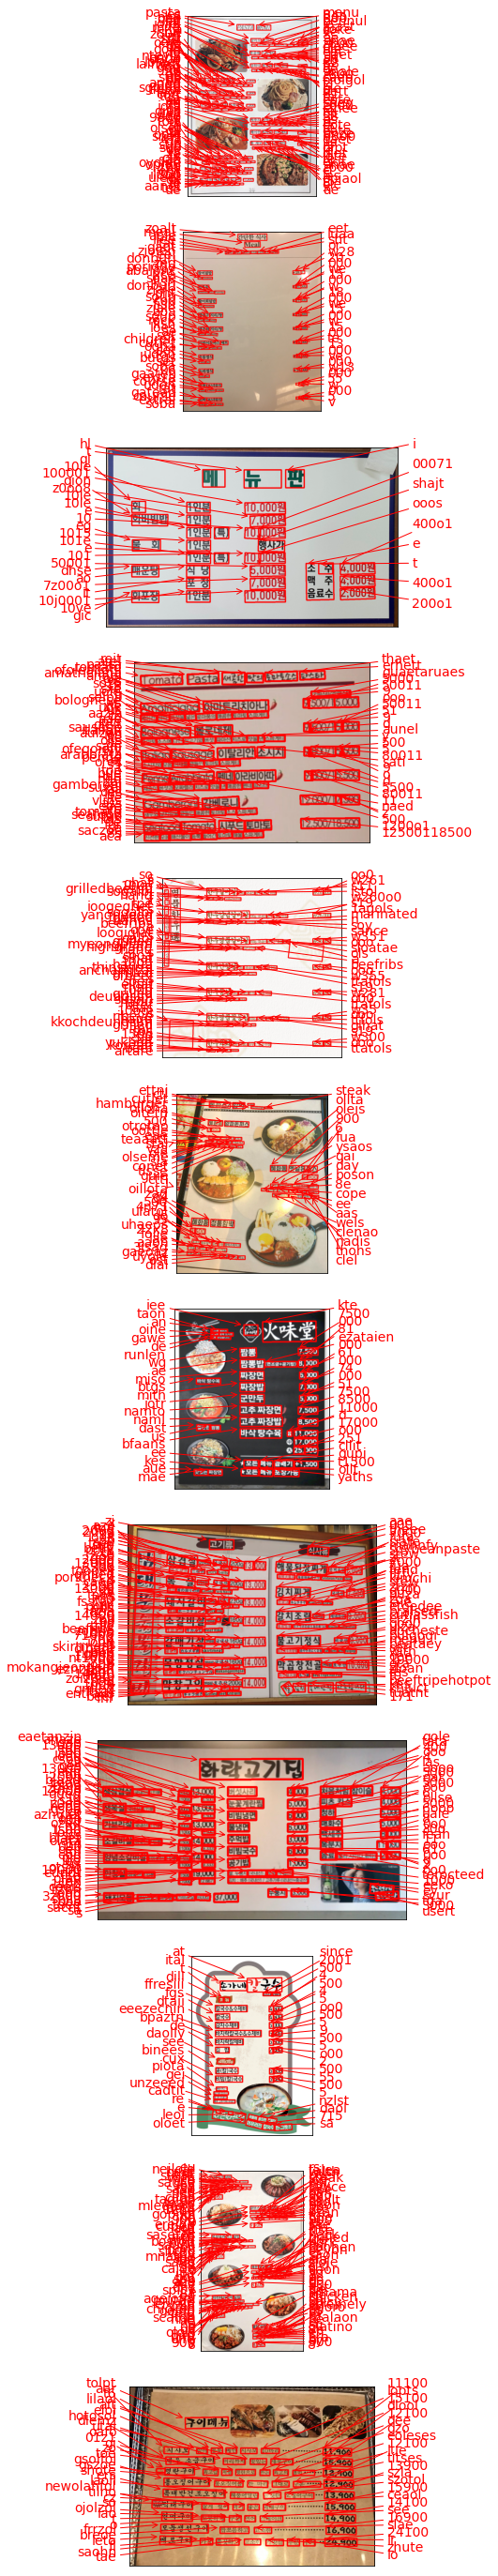

In [6]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(50, 50))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

#### Tesseract

In [7]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='kor',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python'
img_file_path = work_dir + '/menu_test.png'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/0000.png
/aiffel/aiffel/ocr_python/0001.png
/aiffel/aiffel/ocr_python/0002.png
/aiffel/aiffel/ocr_python/0003.png
/aiffel/aiffel/ocr_python/0004.png
/aiffel/aiffel/ocr_python/0005.png
/aiffel/aiffel/ocr_python/0006.png
/aiffel/aiffel/ocr_python/0007.png
/aiffel/aiffel/ocr_python/0008.png
/aiffel/aiffel/ocr_python/0009.png
/aiffel/aiffel/ocr_python/0010.png
/aiffel/aiffel/ocr_python/0011.png
/aiffel/aiffel/ocr_python/0012.png
/aiffel/aiffel/ocr_python/0013.png
/aiffel/aiffel/ocr_python/0014.png
/aiffel/aiffel/ocr_python/0015.png
/aiffel/aiffel/ocr_python/0016.png
/aiffel/aiffel/ocr_python/0017.png
/aiffel/aiffel/ocr_python/0018.png
/aiffel/aiffel/ocr_python/0019.png
/aiffel/aiffel/ocr_python/0020.png
/aiffel/aiffel/ocr_python/0021.png
/aiffel/aiffel/ocr_python/0022.png
/aiffel/aiffel/ocr_python/0023.png
/aiffel/aiffel/ocr_python/0024.png
/aiffel/aiffel/ocr_python/0025.png
/aiffel/aiffel/ocr_python/0026.png
/aiffel/aiffel/ocr_python/0027.png
/aiffel/aiffel/ocr_p

/aiffel/aiffel/ocr_python/0237.png
/aiffel/aiffel/ocr_python/0238.png
/aiffel/aiffel/ocr_python/0239.png
/aiffel/aiffel/ocr_python/0240.png
/aiffel/aiffel/ocr_python/0241.png
/aiffel/aiffel/ocr_python/0242.png
/aiffel/aiffel/ocr_python/0243.png
/aiffel/aiffel/ocr_python/0244.png
/aiffel/aiffel/ocr_python/0245.png
/aiffel/aiffel/ocr_python/0246.png
/aiffel/aiffel/ocr_python/0247.png
/aiffel/aiffel/ocr_python/0248.png
/aiffel/aiffel/ocr_python/0249.png
/aiffel/aiffel/ocr_python/0250.png


In [8]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='kor',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

/2.574

//

~

알2

<

오

올ㅁ

*

?

0

+

마늘

'

2} ㅣ

}

다

'

[

지즈 .

때

내

,

시

놀 /

기

늘어간

살럭

오일

수 ^

봉근

2


스파게티

^,

ㆍ

띠상급

게

“~

트러

버 시

얀

)

래

선선한

ㅡ /

「

|

사봉한

오일

슨 9

상하이

봉긍

2

에

스파게티

^,


각종

향

시

도

|

조개

눈

싱

거

아

이

어울

어진

매

끔

한

오일

슨 ^

푸드

크림

스파게티

^,

/

※

총

해서

「

고

;

갖은

가

재

【

넣 은

지즈

느

| 의

|

) 렴

설6 ^ ~

까

로

Ｌㄴ

!나라

스파게티

6.40002


베 <

|

「1 괴

|

1,

나

}

나

}

놀

시

~

|

싸

1

달

닮 운

크림

연 ……

오징어

먹뭉

크림

스파게티

^,

=


식

애

여 2

}

그

지

않으


들어간

호

쓸*

하고

랑

빨<

「

그림

슨 ^


씨

푸드

토마토

스파게티

2002

=

각종

해

산

몰

과

갖은

야

책

통

넣은

새콤

낳 큼

토마토

선 ~

베이컨

토마토

스파게티

6..4002


구운

베<

|

더

기

야

채 ㆍ

7

어울

어진

매콤한

토마토

슨 ^

통

새우

로제

스파게티

0000

*

도

새

우

2]

다진

야

재

놀이

어울

여진

로제

^

오징어

먹물

크럼

러 주


### Step 3. 테스트 결과 정리
* 모듈들마다 출력 형태가 다르다. 분석을 위해 결과를 일목요연하게 정리해보자. (시각화 방법 활용)

/2.574

Done


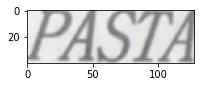

//

Done


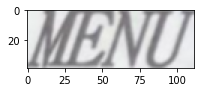

~

Done


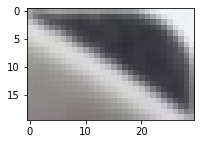

알2

Done


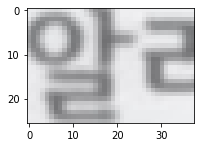

<

Done


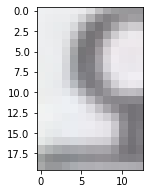

오

Done


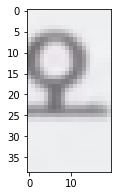

올ㅁ

Done


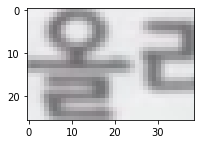

*

Done


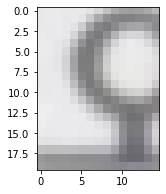

?

Done


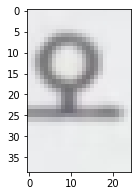

0

Done


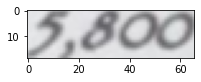

In [9]:
from PIL import Image

for i in range(10):
    plt.figure(figsize = (3, 3))
    pil_img = Image.open(cropped_image_path_list[i])
    recognize_images([cropped_image_path_list[i]])
    plt.imshow(pil_img)
    plt.show()

### Step 4. 결과 분석과 결론 제시
* 구현하고자 하는 서비스의 목적과 내용 정리!
* 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 기준을 제시해보자!
* 그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정해보자!

### OCR을 활용하여 구현하려는 서비스의 기획
1. 목적 : 맛집 메뉴판에서 메뉴를 detect+recognize해서 메뉴별로 카테고리화 하는 작업에 OCR을 활용해보면 어떨까?
2. 평가기준 : 한글 메뉴판에 메뉴를 얼마나 잘 인식하는지 보자!
3. 테스트 결과 및 최종 결론 : keras-ocr은 한글을 인식하지 못하였고 tesseract는 영어와 숫자를 잘 인식하지 못하였다. 여기서 사용한 데이터는 한글 메뉴판 데이터이므로 tesseract 모델을 사용하는 것이 더 좋은 결과를 얻을 수 있었다. 